In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


**previous_application.csv**

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

# **A FIRST SIGHT TO OUR DATASET**

In [2]:
##Columns description (176-213)
columns_description = pd.read_csv('../input/home-credit-default-risk/HomeCredit_columns_description.csv', encoding = 'ISO-8859-1')

In [3]:
columns_description[173:211]

,Unnamed: 0,Table,Row,Description,Special
173,176,previous_application.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
174,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
175,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
176,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
177,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
178,181,previous_application.csv,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
179,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
180,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
181,184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,NaN
182,185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


In [4]:
previous_application = pd.read_csv("../input/home-credit-default-risk/previous_application.csv")

In [5]:
previous_application.head() 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:
previous_application.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [8]:
previous_application.shape

(1670214, 37)

# Calculate and visualize a percentage of missing values

In [9]:
(previous_application.isnull().sum()/previous_application.shape[0])*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [10]:
missing_values_sr = previous_application.isnull().sum()
missing_values_df = missing_values_sr.loc[missing_values_sr > 0].sort_values(ascending = False).reset_index()
missing_values_df.columns = ["Feature", "Number of missing values"]
missing_values_df["Percentage of missing values"] = (missing_values_df["Number of missing values"] / previous_application.shape[0]) * 100

Text(0.5, 1.0, 'Percentage of missing values in the previous applications data')

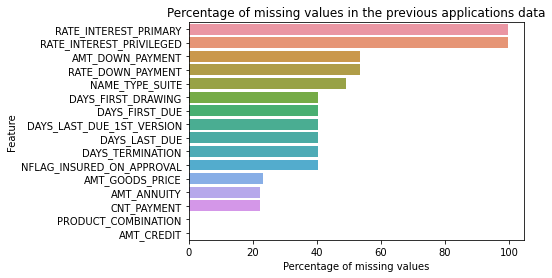

In [11]:
sns.barplot(x = missing_values_df["Percentage of missing values"], y = missing_values_df["Feature"])
plt.title("Percentage of missing values in the previous applications data")

- Here we can see that two features have nearly 100% of missing values. 
- For other features that have missing values, we can see that some features have the same number of missing values. 
- It's possible that there is correlation between missing values for them.

# SUMMARIZATION

In [12]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [13]:
#Drop 2 features 'SK_ID_PREV','SK_ID_CURR' because I think it doesn't need to extract information of 2 features when we do EDA
previous_application.drop(['SK_ID_PREV','SK_ID_CURR'], axis = 1, inplace=True)
print('Previous_application shape:', previous_application.shape)
previous_application.head()

Previous_application shape: (1670214, 35)


,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# PERFORMING EDA

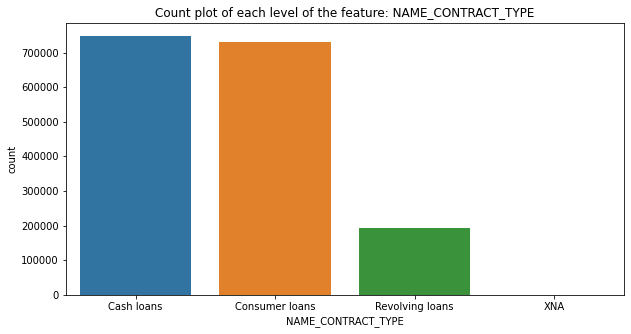

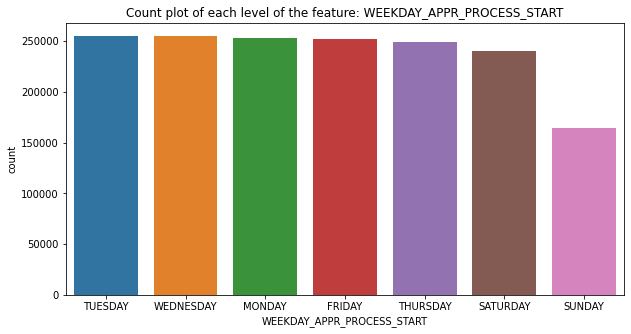

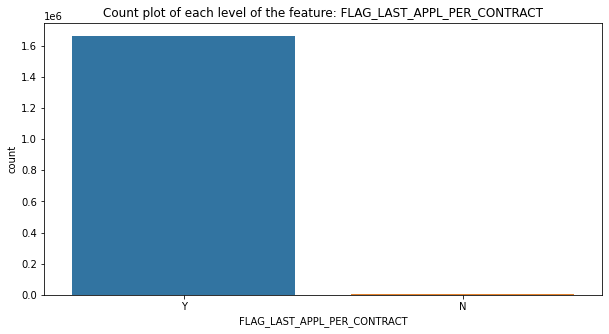

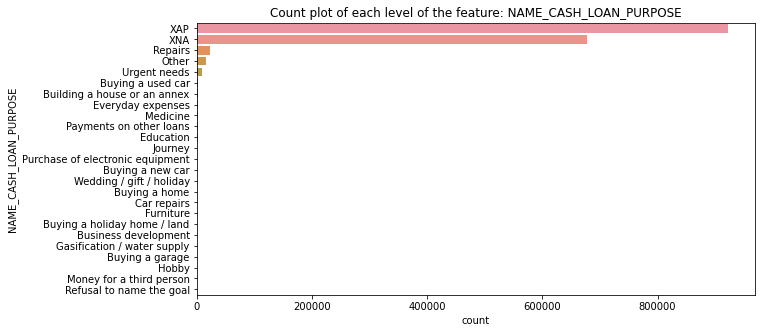

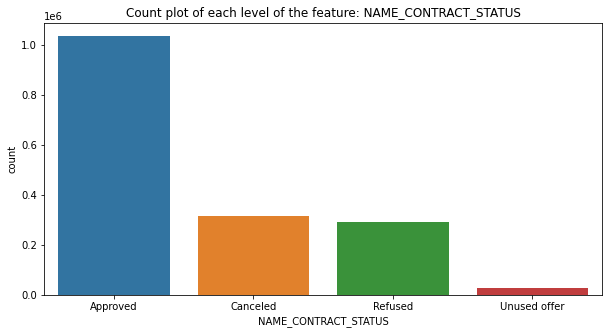

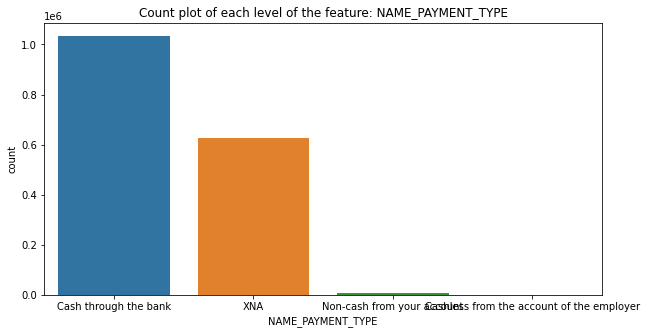

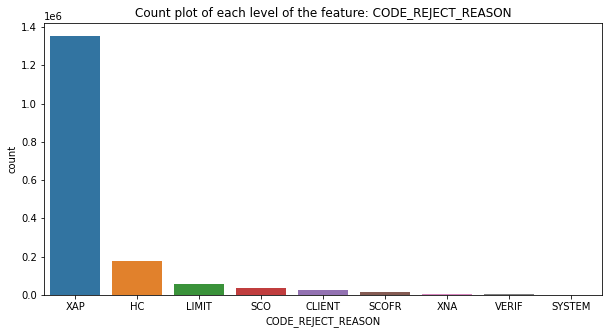

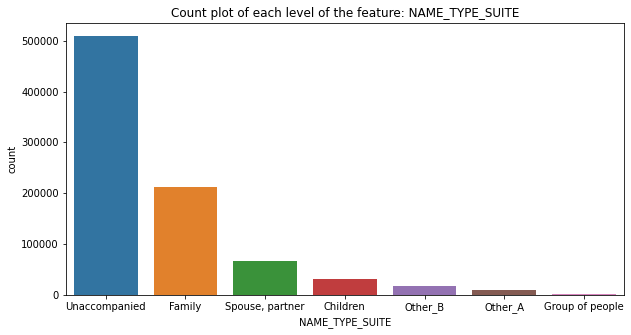

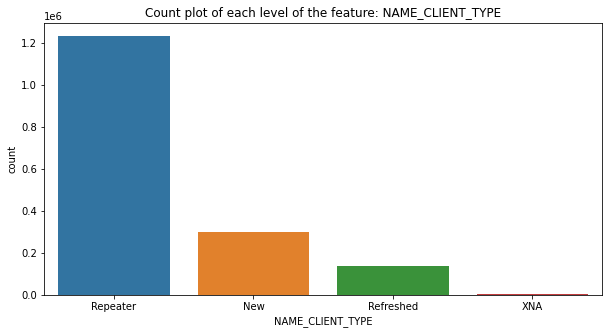

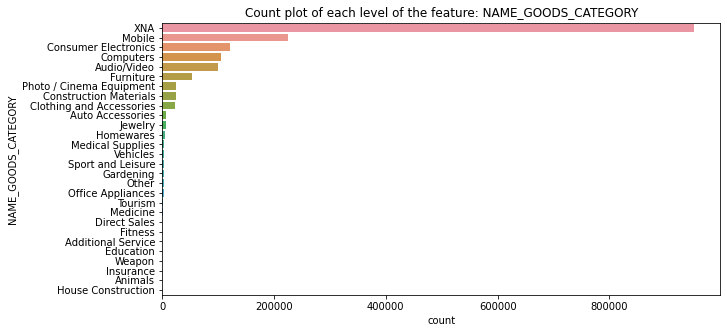

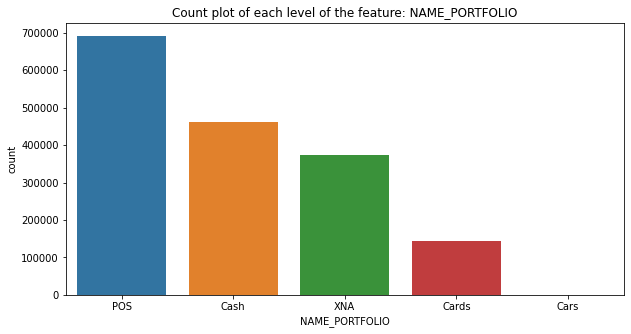

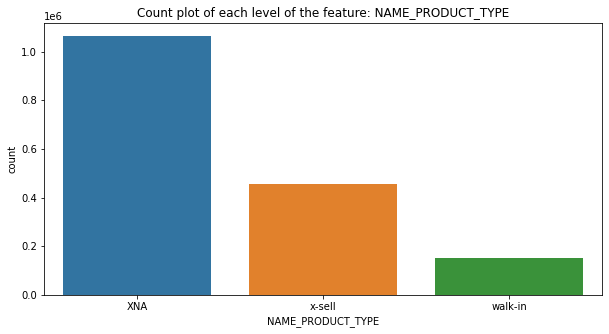

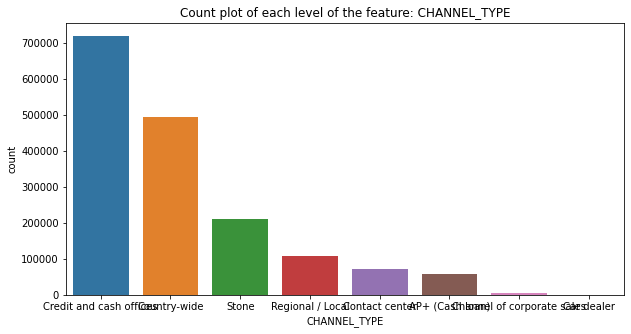

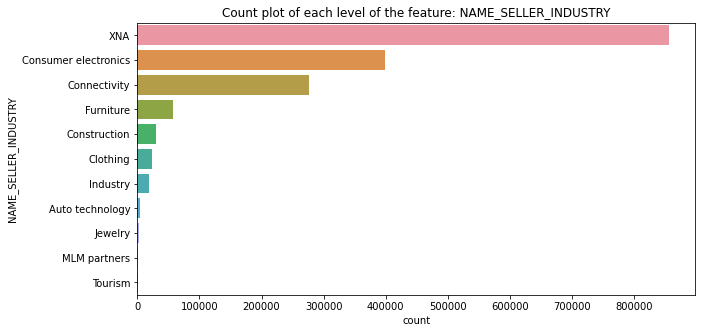

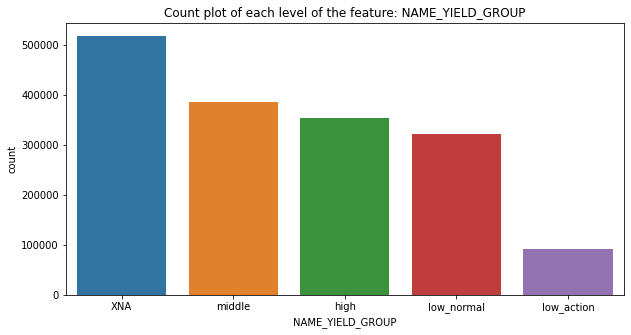

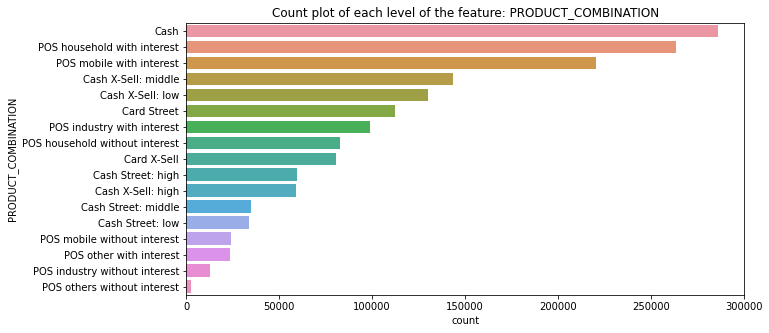

In [14]:
#Select all the columns that have 'object' type to  extract information from each features

categorical_features_lst = previous_application.select_dtypes(["object"]).columns.tolist()

for feature in categorical_features_lst: 
    fig, ax = plt.subplots(figsize = (10, 5))
    # Plot levels distribution
    if previous_application[feature].nunique() < 10: 
        sns.countplot(data = previous_application, x  = feature, order = previous_application[feature].value_counts().index.tolist())
    else: 
        sns.countplot(data = previous_application, y = feature, order = previous_application[feature].value_counts().index.tolist())
    ax.set_title("Count plot of each level of the feature: " + feature)

We can get useful insights from the plots above:

- Most of the previous loans were cash loans or consumer loans.
- For *NAME_CASH_LOAN_PURPOSE*, the two highest common levels are not documented in the data description: "XAP" and "XNA".
- We can see that if we remove "XNA" / "XAP" levels from the features, goods that clients buy are mostly electronic devices like computers or smartphones. Then comes furniture and building materials.
- For WEEKDAY_APPR_PROCESS_START, Sunday is day of the week with the fewest client apply for previous application.
- For CODE_REJECT_REASON, XAP takes most of this feature
- For FLAG_LAST_APPL_PER_CONTRACT, Y takes most of this feature

In [15]:
#Select columns which have 2 types "float64", "int64"
numerical_features_lst = list(set(previous_application.columns.tolist()) - set(categorical_features_lst))  
numerical_features_df = previous_application[numerical_features_lst]
numerical_features_df.fillna(-1, inplace = True)  

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


# Histogram of the numerical features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


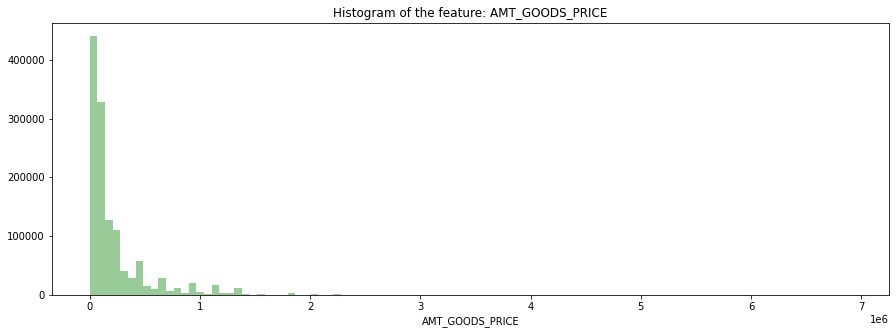

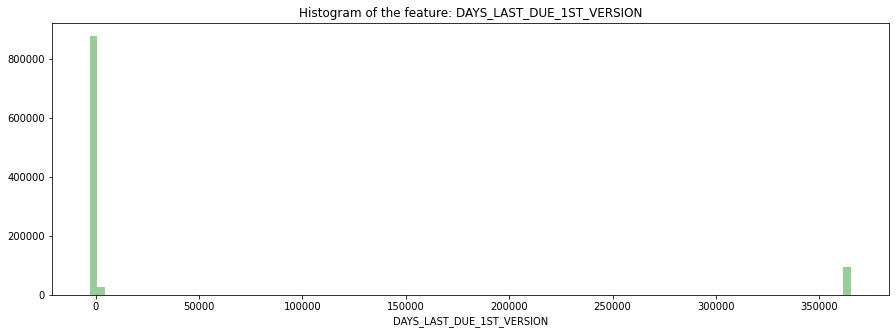

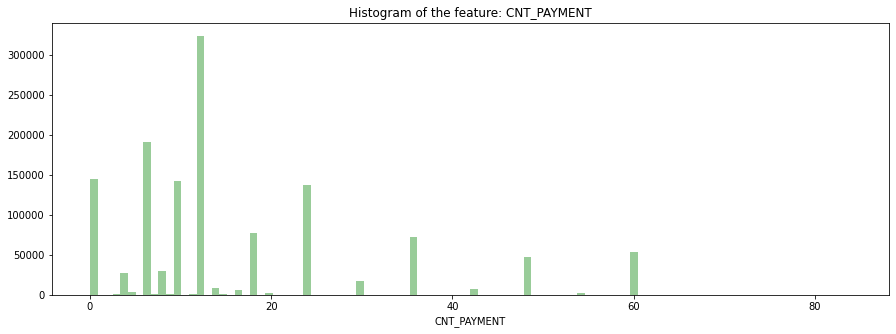

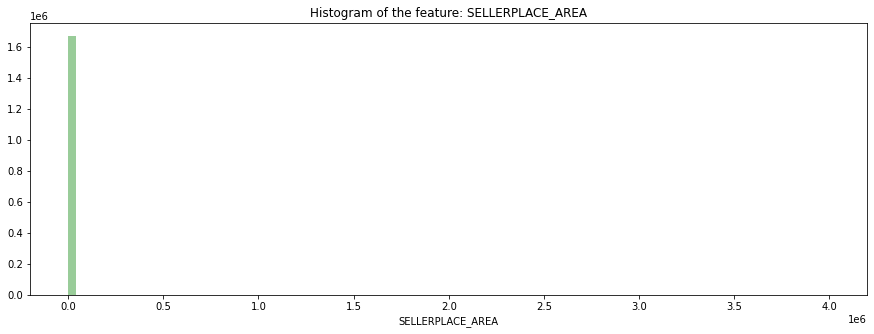

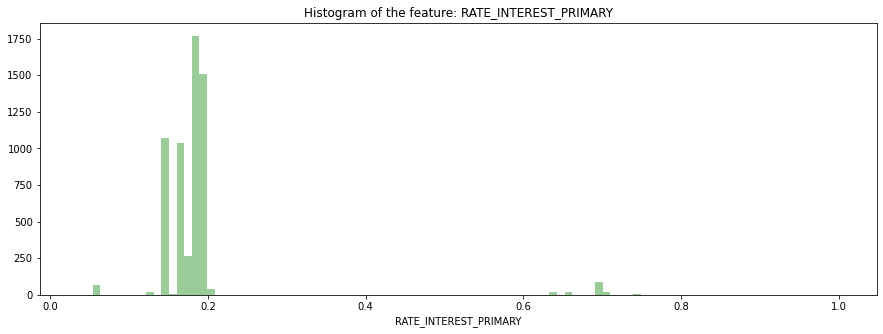

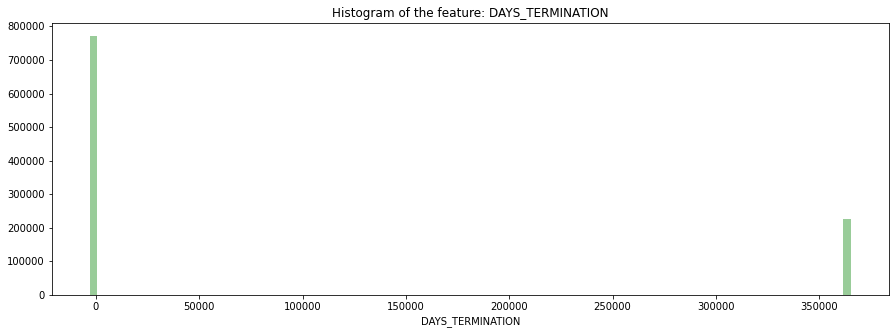

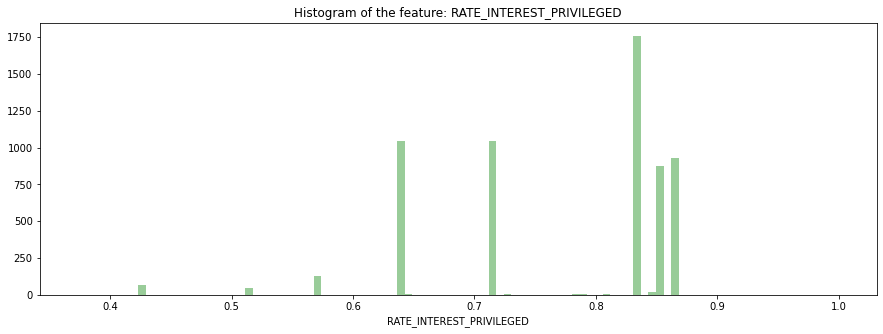

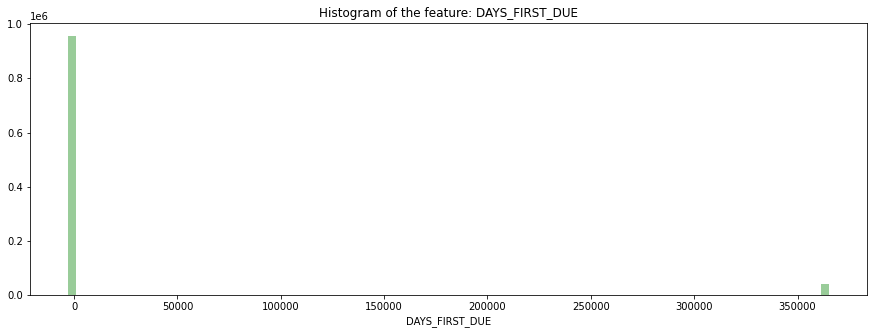

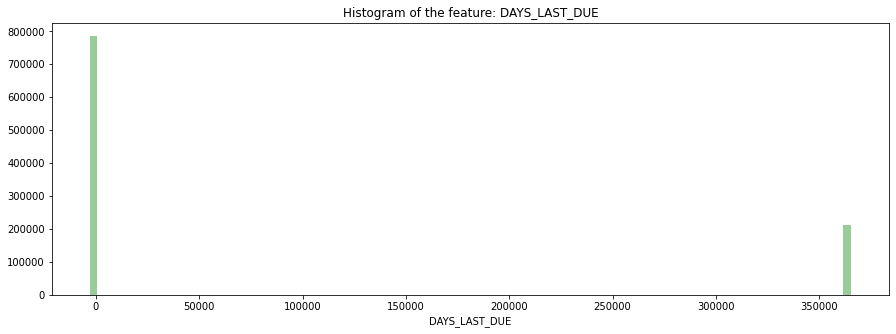

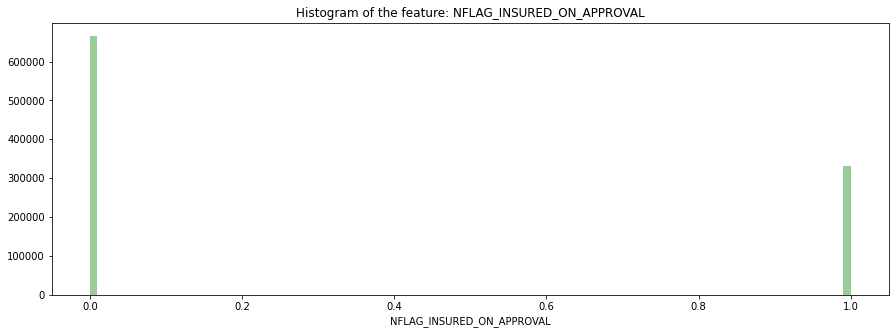

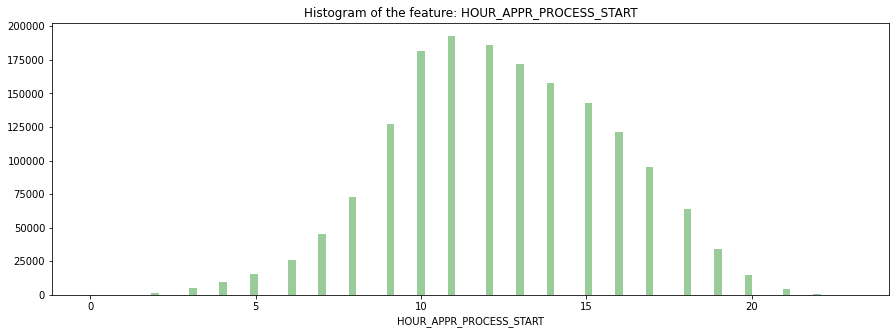

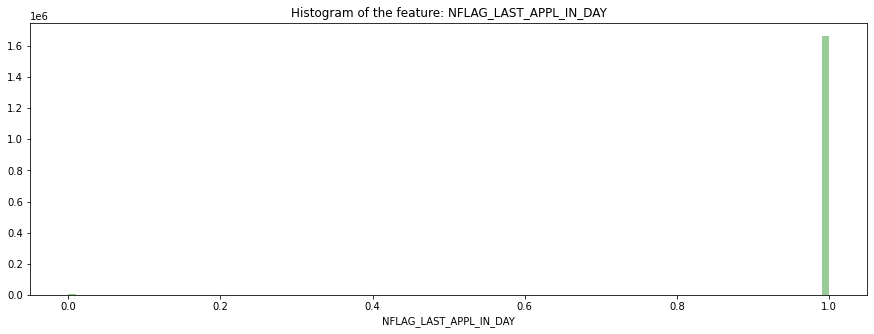

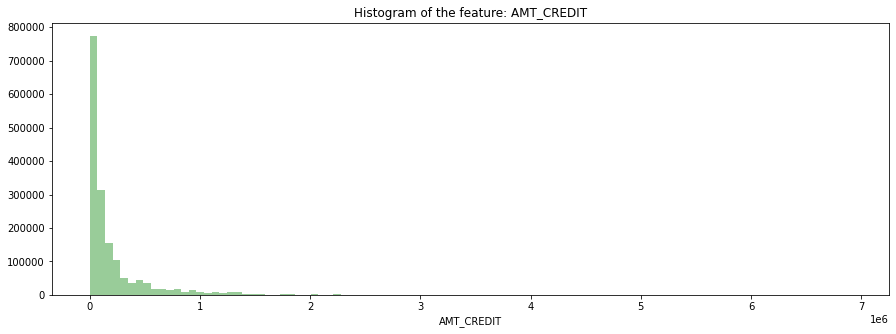

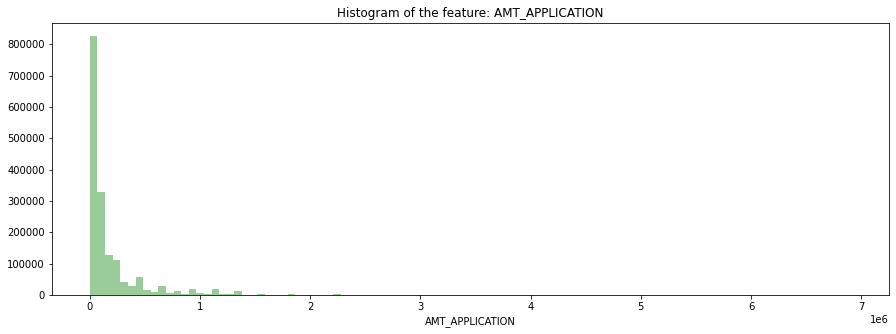

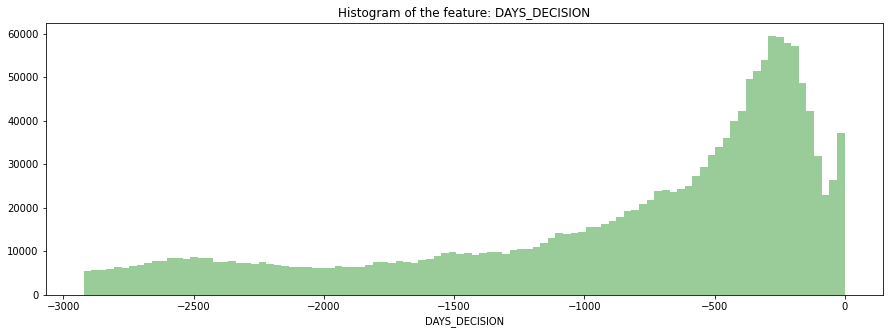

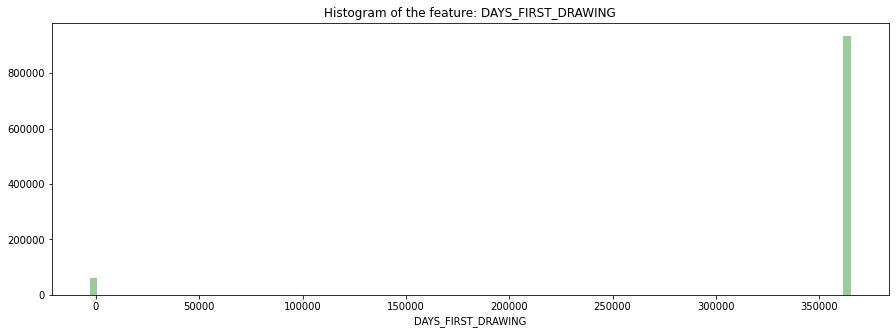

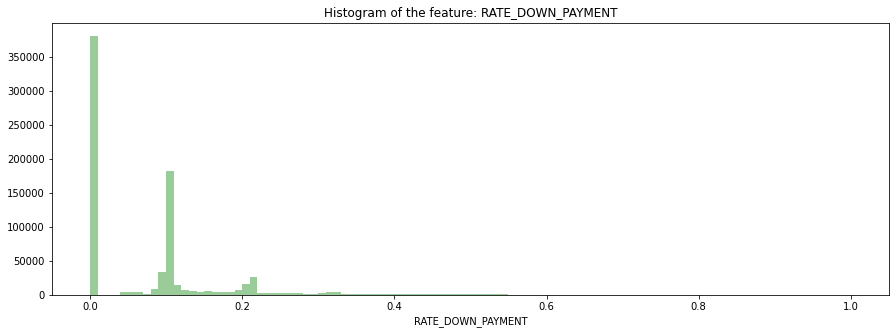

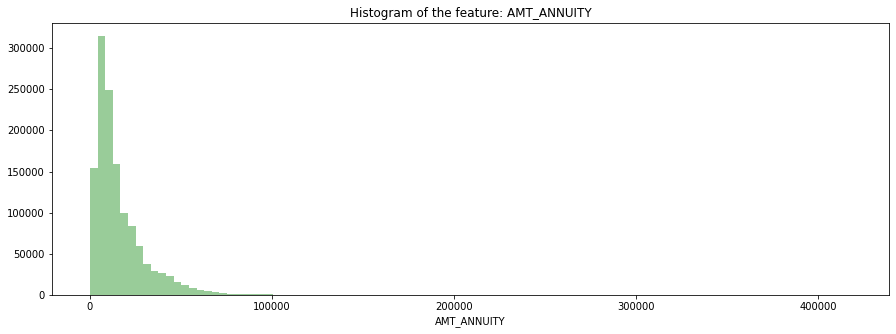

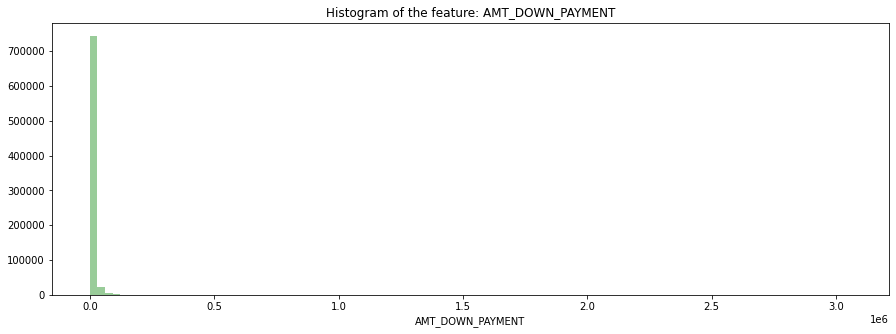

In [16]:
#Visualize all numerical features to see problems
for feature in numerical_features_lst:
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.distplot(previous_application[feature].dropna(), kde = False, bins = 100, ax = ax, color = 'g')
    ax.set_title("Histogram of the feature: " + feature)


Here we can see lots of outliers in the features and high skewness. There is something strange in the data for the following features: DAYS_TERMINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION and DAYS_LAST_DUE: all those features have an important amount of values greater than 350000 days. This is roughly equal to 1000 years

# Check outlier for numerical features

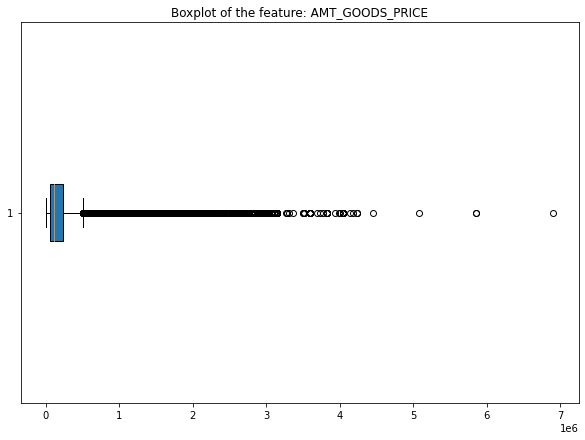

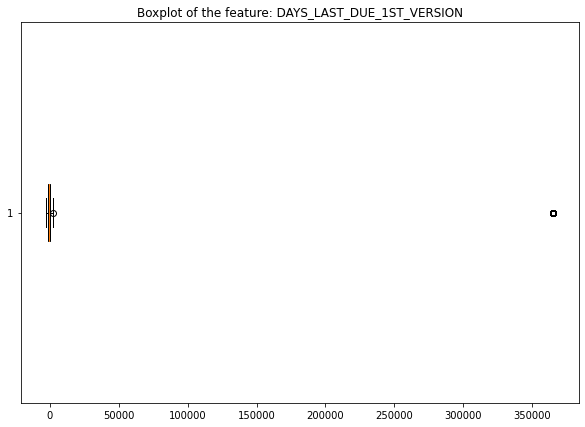

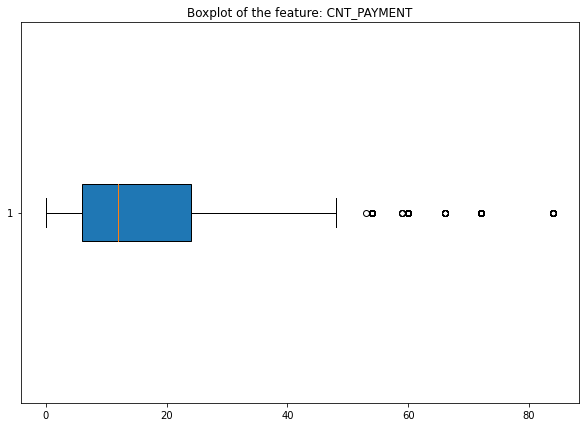

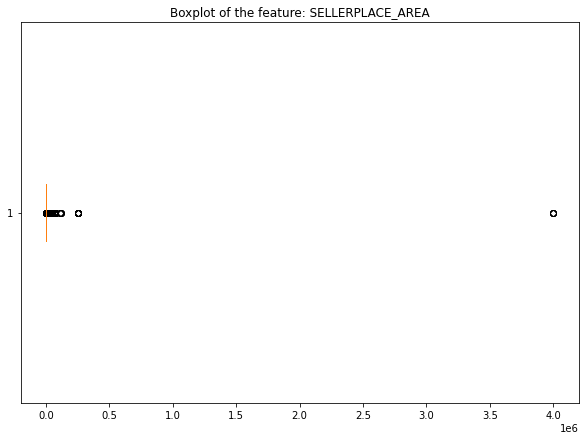

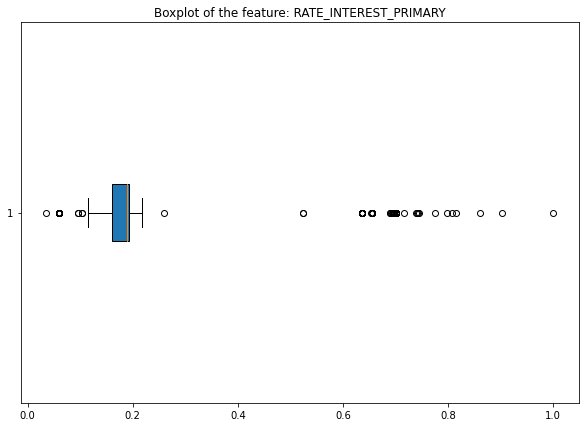

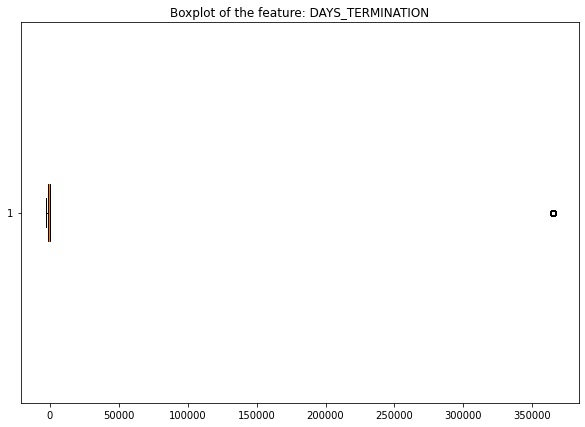

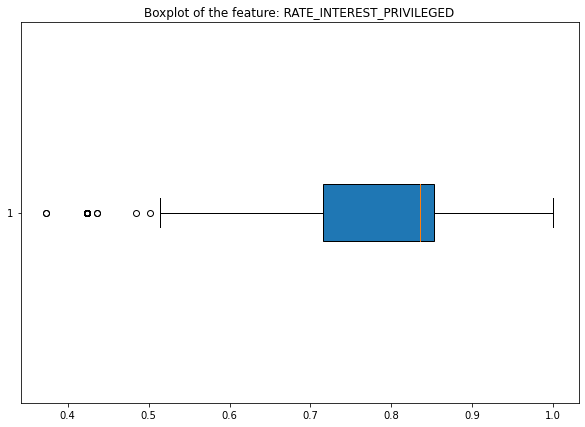

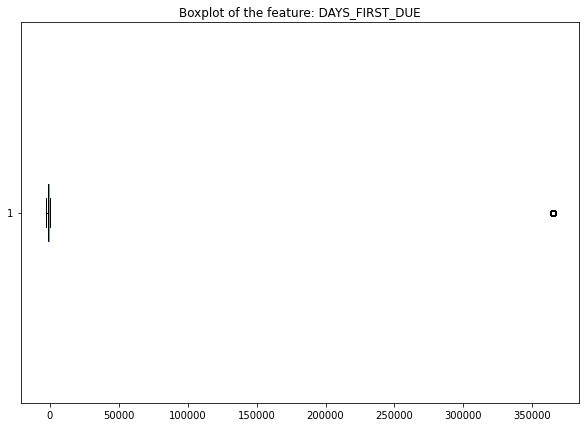

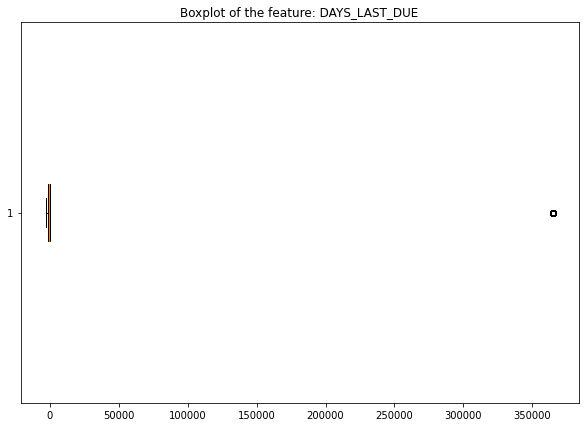

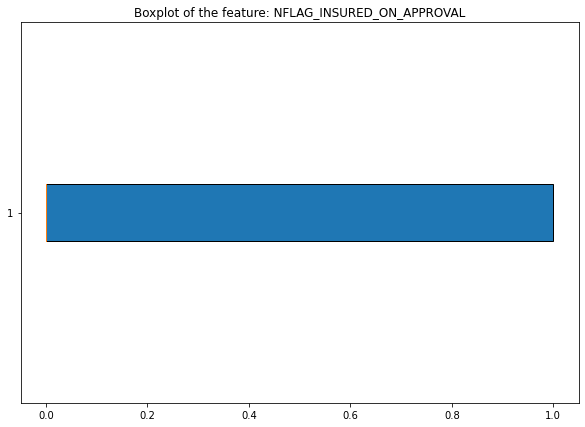

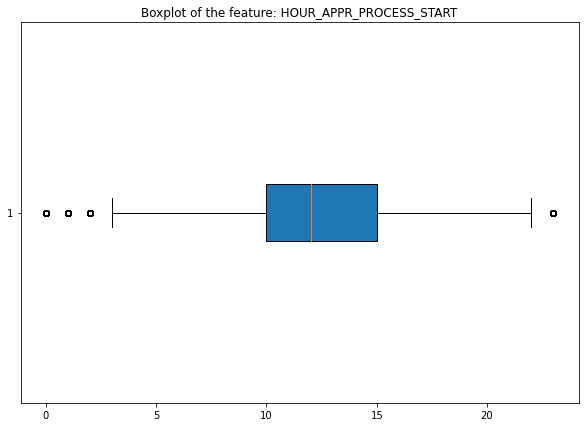

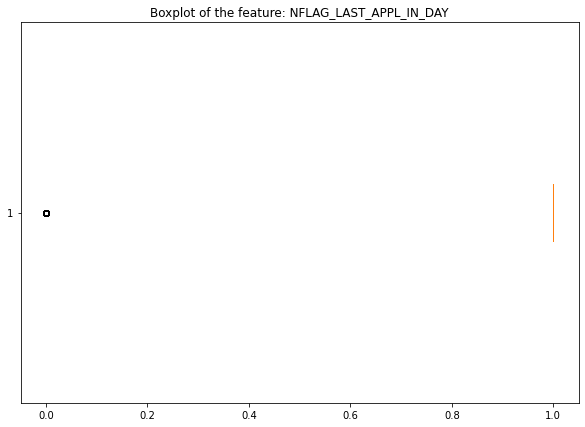

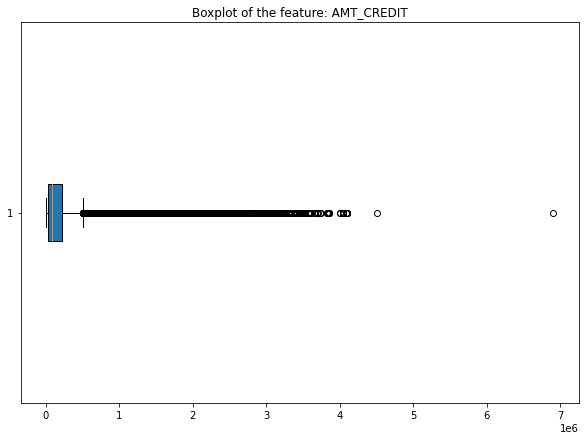

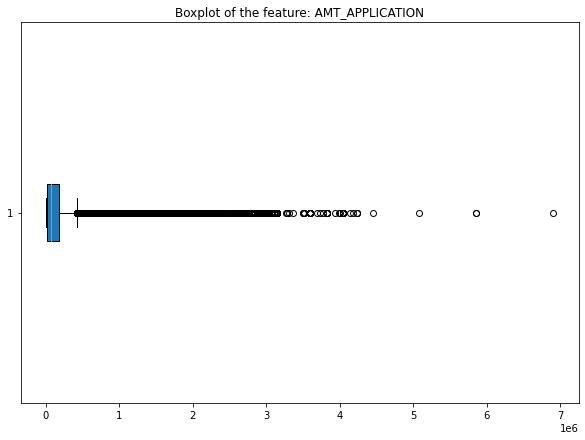

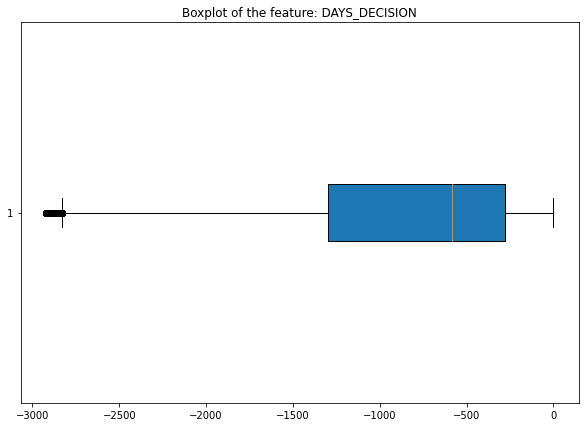

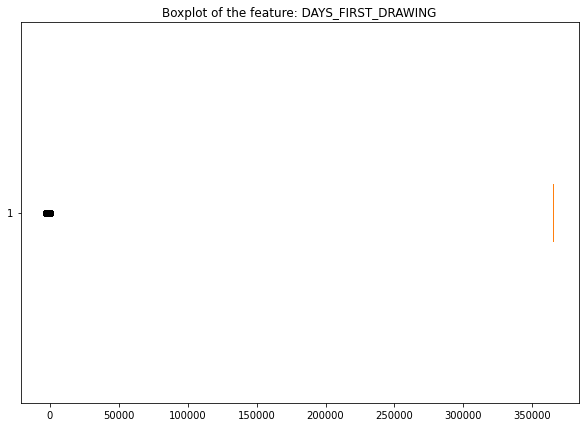

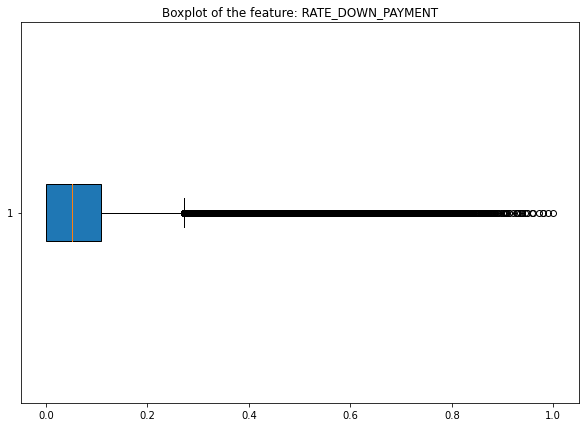

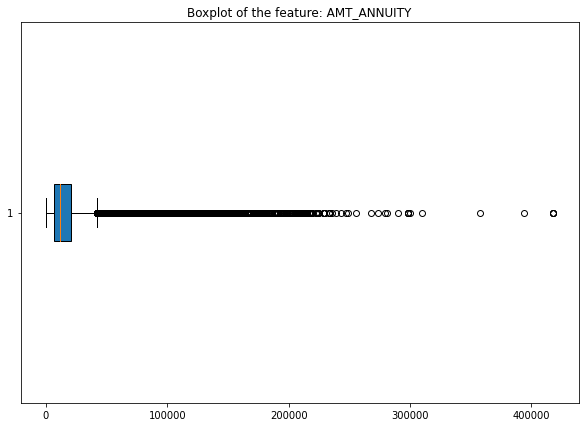

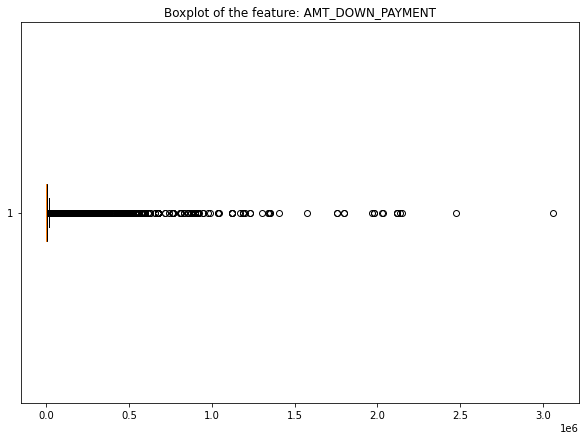

In [17]:
for feature in numerical_features_lst:
    fig, ax = plt.subplots(1, 1, figsize = (10, 7))
    plt.boxplot(previous_application[feature].dropna(), patch_artist =True, vert = False)
    ax.set_title("Boxplot of the feature: " + feature)

We can see that AMT_APPLICATION, SELLERPLACE_AREA, DAYS_FIRST_DRAWING, AMT_DOWN_PAYMENT, 
NFLAG_LAST_APPL_IN_DAY, RATE_INTEREST_PRIMARY, 
DAYS_TERMINATION, DAYS_LAST_DUE_1ST_VERSION, AMT_CREDIT,
 HOUR_APPR_PROCESS_START, AMT_ANNUITY, CNT_PAYMENT, DAYS_LAST_DUE,
 AMT_GOODS_PRICE, RATE_INTEREST_PRIVILEGED, DAYS_FIRST_DUE have outlier values (most of them are min/max values on the table)

# Plot heatmap to show correlation between numerical features

Text(0.5, 1.0, 'Correlation plot between numerical features')

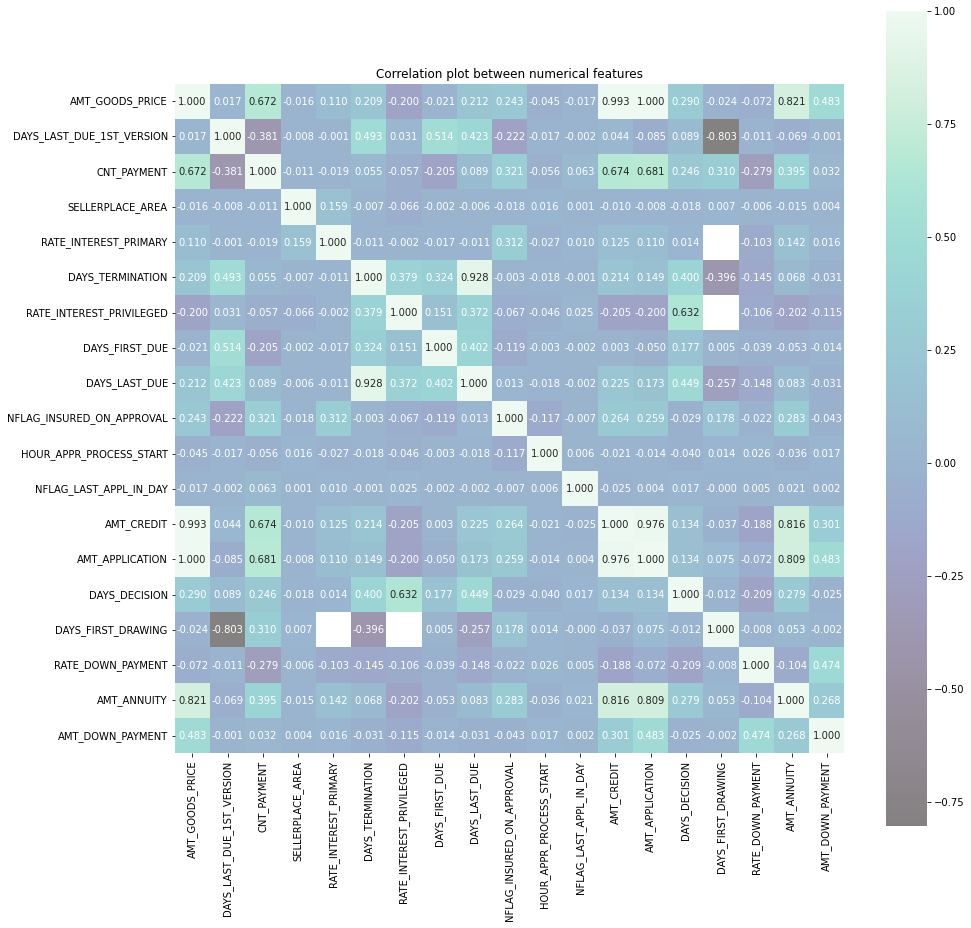

In [18]:
plt.figure(figsize = (15, 15))
sns.heatmap(previous_application[numerical_features_lst].corr(), annot = True, cmap="mako" , alpha = 0.5, fmt = ".3f", square = True)
plt.title("Correlation plot between numerical features")
#annot = True   #gives you the numbers instead of just the colors.
#cmap = "mako"  #is a color scheme that I like to use
#alpha = 0.5    #tones down the intensity of the colors
#fmt = ".4f"    #formats the numbers to four decimal places

Here, we can see several interesting things:
- Some features are highly correlated, which above |0.9|: *DAYS_TERMINATION* and *DAYS_LAST_DUE, AMT_APPLICATION* and *AMT_GOODS_PRICE, AMT_APPLICATION* and *AMT_CREDIT, AMT_GOODS_PRICE* and *AMT_CREDIT*
- Some features are duplicated: *AMT_GOODS_PRICE and AMT_APPLICATION*. Those two features are highly correlated with AMT_CREDIT.
- Some other features are highly correlated, either positively or negatively.

We will delete 1 feature in each couple features which have a correlation above |0.9|

# END EDA

# DATA CLEANING

# Delete columns with the percentage of missing values > 90%

In [19]:
null_percent = (previous_application.isnull().sum()/previous_application.shape[0])*100
null_above_90 = pd.DataFrame()
null_above_90['Percentage of null'] = null_percent[null_percent > 90]
null_above_90

,Percentage of null
RATE_INTEREST_PRIMARY,99.643698
RATE_INTEREST_PRIVILEGED,99.643698


In [20]:
previous_application.drop(null_percent[null_percent > 90].index, inplace=True, axis=1)

# Delete columns with the correlation > |0.9|

Some features are highly correlated, which above |0.9|:  DAYS_TERMINATION and DAYS_LAST_DUE, AMT_APPLICATION and AMT_GOODS_PRICE, AMT_APPLICATION and AMT_CREDIT, AMT_GOODS_PRICE and AMT_CREDIT.

Between:
+ DAYS_TERMINATION and DAYS_LAST_DUE, delete feature **DAYS_TERMINATION** because it was the expected termination, while DAYS_LAST_DUE was the last due date, which would definitely happen.
+ AMT_APPLICATION and AMT_GOODS_PRICE, both features **AMT_APPLICATION** and **AMT_GOODS_PRICE** are duplicated, however, **AMT_GOODS_PRICE** had more missing values, so we can choose to delete this feature
+ AMT_APPLICATION and AMT_CREDIT, delete feature **AMT_APPLICATION** because Final credit amount on the previous application differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount, in fact, final credit was the one which was finally saved
+ AMT_GOODS_PRICE and AMT_CREDIT, delete feature **AMT_GOODS_PRICE** because Goods price of good that client asked for is unnecessary, compared with Final credit amount on the previous application, which is more neccesary

In [21]:
previous_application.drop(['DAYS_TERMINATION', 'AMT_GOODS_PRICE', 'AMT_APPLICATION'], inplace=True, axis=1)

# Drop other features

In [22]:
#Show the percentage of Y values in two columns 'SK_DPD', 'SK_DPD_DEF'
percent_Y = (previous_application[previous_application['FLAG_LAST_APPL_PER_CONTRACT'] == 'Y']['FLAG_LAST_APPL_PER_CONTRACT'].value_counts().sum()/previous_application.shape[0])* 100
print("Percentage of Y value:", percent_Y)

#Show the percentage of XAP values in column 'CODE_REJECT_REASON'
percent_XAP = (previous_application[previous_application['CODE_REJECT_REASON'] == 'XAP']['CODE_REJECT_REASON'].value_counts().sum()/previous_application.shape[0])* 100
print("Percentage of XAP value:", percent_XAP)

Percentage of Y value: 99.49257999274344
Percentage of XAP value: 81.01315160811728


In [23]:
#Show the percentage of XAP and XNA values in column 'NAME_CASH_LOAN_PURPOSE'
previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

We drop this features:
- For FLAG_LAST_APPL_PER_CONTRACT, Y takes most of this feature (99.49%)<br>
- For CODE_REJECT_REASON, XAP takes most of this feature (81.01%); moreover, those reasons in this feature are not explained well<br>
- For NAME_CASH_LOAN_PURPOSE, it has too many XAP (55.24%), XNA (40.58%) values, these values take totally around 96% of this feature<br>
- For DAYS_FIRST_DRAWING, day of the first disbursement of the previous application is invalid, because there are many values above 350000 days (1000 years)<br>
- For DAYS_FIRST_DUE, DAYS_LAST_DUE, DAYS_LAST_DUE_1ST_VERSION are the first due supposed to be of the previous application, the first due of the previous application and  the last due date of the previous application in order, because there are many values above 350000 days (1000 years) which are invalid, so we will drop this features

In [24]:
previous_application.drop(['FLAG_LAST_APPL_PER_CONTRACT', 'CODE_REJECT_REASON', 'NAME_CASH_LOAN_PURPOSE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION'], inplace=True, axis=1)

In [25]:
#After cleaning, we have those features left
previous_application.columns

Index(['NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')